###Solving Housing price prediction using Linear regression 

**Import our libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read Our Data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning Workshop/code/housing_price_data.csv")
print(data)

          size         price
0   325.023453  31707.005847
1   534.268040  68777.595982
2   615.303580  62562.382298
3   474.756396  71546.632234
4   598.132079  87230.925134
..         ...           ...
95  500.301743  81536.990783
96  492.397653  72111.832470
97  500.395759  85232.007342
98  481.498589  66224.957888
99  251.284846  53454.394215

[100 rows x 2 columns]


**Plot our data**

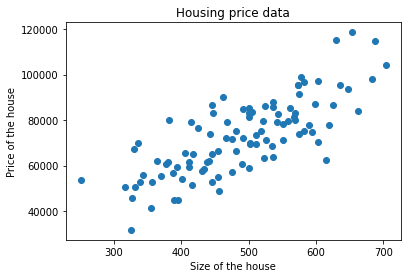

In [ ]:
plt.scatter(data["size"], data["price"])
plt.xlabel("Size of the house")
plt.ylabel("Price of the house")

plt.title("Housing price data")
plt.show()

**Define Model baseLine and hyper parameters**

In [ ]:
# Y = mX + b 
def myfunc(x):
  return m * x + b
  
learning_rate = 0.000001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

**Define our Loss/Cost function**

In [ ]:
def compute_cost_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

**Define our Optimazer**

In [ ]:
def gradient_descent(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
    #Update our learnable parameters     
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

**Train our model**

In [ ]:
b = initial_b
m = initial_m
for i in range(num_iterations):
  b, m = gradient_descent(b, m, np.array(data), learning_rate)
  
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_cost_for_given_points(b, m, np.array(data))))

After 1000 iterations b = 0.8941114068197181, m = 147.94721764544937, error = 112667634.07967968


**Test our model**


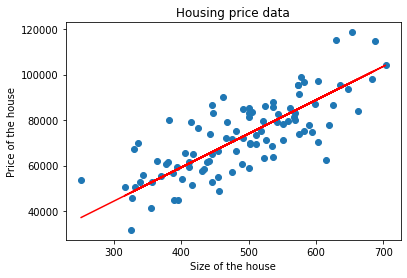

In [ ]:
mymodel = list(map(myfunc, data["size"]))

plt.scatter(data["size"], data["price"])
plt.xlabel("Size of the house")
plt.ylabel("Price of the house")
plt.title("Housing price data")

plt.plot(data["size"], mymodel,color='Red')

plt.show()

In [ ]:
# GradientDescentExample :  https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif
# Loss function plot :  http://spin.atomicobject.com/wp-content/uploads/gradient_descent_error_surface.png